# Solucion de Ecuaciones de una variable y serie de Fourier

Para este primer modulo se llevara a cabo la solucion de Ecuaciones de una variable mediante los siguientes metodos que se iran explicando mas adelante:

_Método de Bisección, método de la Secante, método de Punto fijo, método de Steffensen, método de Aitken y el método de Müller_

Antes de comenzar cabe recalcar lo siguiente, para que los programas aqui definidos tengan su correcto funcionamiento se les debe de alimentar de los siguientes parametros: Función  *$f(x)$* o  *$g(x)$*, puntos o valores iniciales necesarios para aplicar cada método, tolerancia $\epsilon$ que se desea cumplir en la aproximación. Lo cual debe ingresarse en una celda de Jupyter antes de ejecutar el método.


## Metodo de Biseccion

En el analisis numerico el **_Método de Biseccion_** es un algoritmo de búsqueda de raíces que trabaja dividiendo el intervalo a la mitad y seleccionando el subintervalo que contiene a la raíz

### Dependencias

In [4]:
from math import ceil
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, display_html, HTML
init_printing()

x = symbols('x')

### Programa

In [5]:
# Solicitando la función a evaluar
while True:
    try:
        f = sympify(input('Ingrese la función a calcular su raíz: '))
        break
    except SympifyError as err:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")

Ingrese la función a calcular su raíz: x**2 - 3*x - 1


In [53]:
# Solicitando el intervalo en el que se evalúa
while True:
    try:
        a = float(input("Ingrese el límite inferior del intervalo (a): "))
        b = float(input("Ingrese el límite superior del intervalo (b): "))
        if a > b:
            print("El límite inferior es mayor que el superior, se invertirán para continuar con el desarrollo")
            a, b = b, a
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")
lowerbound = a
higherbound = b

Ingrese el límite inferior del intervalo (a): -1
Ingrese el límite superior del intervalo (b): 0


In [7]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")
        
print(tol)

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-3
0.001


In [54]:
n = ceil(log(abs(higherbound-lowerbound)/tol,2))
print("Número máximo de iteraciones: {}\n".format(n))

a = lowerbound
b = higherbound
fa = f.subs(x, a).evalf()
fb = f.subs(x, b).evalf()
data = []
methodFailed = True
if fb*fa < 0:
    for i in range(n):
        c = (a+b)/2
        fc = f.subs(x, c).evalf()
        e_abs = abs((b-a)/2)
        aux = [str(i), "{:.10f}".format(a), "{:.10f}".format(b),
               "{:.10f}".format(c), "{:.10f}".format(fc), "{:.10e}".format(e_abs)]
        data.append(aux)
        fa = f.subs(x, a).evalf()
        if fc == 0 or e_abs < tol:
            methodFailed = False
            break
        if fc*fa < 0: b = c
        else: a = c
    if methodFailed:
        print('El método falló después de {} iteraciones'.format(n))
    else:
        table = ( '<table class="table-bordered table-responsive"><thead><tr>'
                 '<th style="text-align:center; width:40px;">i</th><th style="text-align:center;">a</th>'
                 '<th style="text-align:center;">b</th><th style="text-align:center;">c</th>'
                 '<th style="text-align:center;">f(c)</th><th style="text-align:center;">Eabs</th></tr></thead>'
                 '<tbody><tr>{}</tr>'
                 '</tbody></table>'
        ).format(
            '</tr><tr>'.join(
                '<td style="text-align:center;">{}</td>'.format('</td><td>'.join(j for j in row)) for row in data
            )
        )

        display(HTML(table))
        print("Raíz encontrada: {}\nEn la iteración {}".format(c, i+1))
else:
    print("No se puede garantizar la existencia de una raíz en el intervalo proporcionado para la función. [{},{}]"
         .format(lowerbound, higherbound)
         )

Número máximo de iteraciones: 10



i,a,b,c,f(c),Eabs
0,-1.0000000000,0.0000000000,-0.5000000000,0.7500000000,5.0000000000e-01
1,-0.5000000000,0.0000000000,-0.2500000000,-0.1875000000,2.5000000000e-01
2,-0.5000000000,-0.2500000000,-0.3750000000,0.2656250000,1.2500000000e-01
3,-0.3750000000,-0.2500000000,-0.3125000000,0.0351562500,6.2500000000e-02
4,-0.3125000000,-0.2500000000,-0.2812500000,-0.0771484375,3.1250000000e-02
5,-0.3125000000,-0.2812500000,-0.2968750000,-0.0212402344,1.5625000000e-02
6,-0.3125000000,-0.2968750000,-0.3046875000,0.0068969727,7.8125000000e-03
7,-0.3046875000,-0.2968750000,-0.3007812500,-0.0071868896,3.9062500000e-03
8,-0.3046875000,-0.3007812500,-0.3027343750,-0.0001487732,1.9531250000e-03
9,-0.3046875000,-0.3027343750,-0.3037109375,0.0033731461,9.7656250000e-04


Raíz encontrada: -0.3037109375
En la iteración 10


In [2]:
#%%latex
#definiendo la f(x) a la cual deseamos calcular su raiz
from sympy import *
init_printing()
from ipywidgets import *
from IPython.display import *
from IPython.display import Markdown, display
from IPython.display import clear_output
import numpy
from sympy import *
from IPython.display import display, Math, Latex, HTML
def f(x):
    return x **2 - 3 * x - 1

a = 0
b = -1
error = 1
epsilon = 1e-3
#it_minimas = floor(ln((b - a) / epsilon)) + 1
i=0
data = [['Ni','a','b','c','F(a)','F(b)','F(c)']]
while error > epsilon:
    c = (a + b) / 2
    fa = f(a) 
    fc = f(c)
    fb = f(b)
    aux=[]
    if fa * fb < 0:    
        if fc ==0:
            print("La raiz es c")
            break
        elif fa * fc < 0 :
            b = c
        else:
            aux=[i,a,b,c,fa,fb,fc]
            a = c
            raiz = c
            i+=1
            error = abs(fc)
            data.append(aux)
    else :
        print("La raiz no se encuentra en el intervalo proporcionado")
        break 
        
display(HTML(
    '<table class="table"><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

print("La raiz encontrada es: ",raiz," en la iteracion ",i)

Ni,a,b,c,F(a),F(b),F(c)
0,0,-0.5,-0.25,-1,0.75,-0.1875
1,-0.25,-0.3125,-0.28125,-0.1875,0.03515625,-0.0771484375
2,-0.28125,-0.3125,-0.296875,-0.0771484375,0.03515625,-0.021240234375
3,-0.296875,-0.3046875,-0.30078125,-0.021240234375,0.00689697265625,-0.0071868896484375
4,-0.30078125,-0.3046875,-0.302734375,-0.0071868896484375,0.00689697265625,-0.000148773193359375


La raiz encontrada es:  -0.302734375  en la iteracion  5


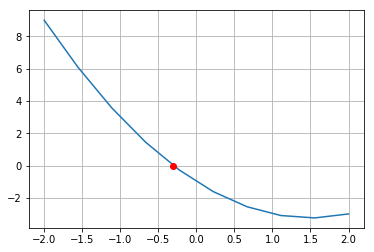

In [8]:
%matplotlib inline
import matplotlib.pyplot as plot
import numpy as np

x = np.linspace(-2,2,10)
plot.plot(x,f(x))
plot.plot([raiz],[fc],"ro")
plot.grid()
plot.show()

#Aca se puede observar mas o menos el intervalo de nuestra raiz

## Metodo de punto fijo

#### El metodo de punto fijo es un algoritmo que trabaja de manera recursiva con iteraciones anteriores, para de esta manera encontrar las raices solucion a una ecuacion que se plantea de la siguiente manera $x = g(x)$  donde  $x - g(x) = f(x)$

In [24]:
#%latex
#Primero definimos la funcion G(x) ya lista para el proceso iterativo
#a partir de la funcion f(x) = x^2 - 3x -1 se define la g (x) o a partir de cualquier otra funcion arbitraria
from math import *
def g(x):
    y = 1 /(x - 3)
    return y
p0=0

tol=1e-10

n0=300

i=0

tabla=[["i","p","g(p)","Error"]]

while i<=n0:

    p=g(p0)
    aux2=[]
    if abs(p-p0)<tol:

        print("El punto fijo es ",p," despues de ",i," iteraciones")
    
        break
    
    aux2=[i,p,p0, abs(p - p0) ]
        
    i=i+1
    
    
    p0=p
    
    tabla.append(aux2)
    
if i>n0:

    print("El metodo no converge ")
    
display(HTML(
    '<table class="table"><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabla)
        )
 ))



El punto fijo es  -0.3027756377332649  despues de  10  iteraciones


i,p,g(p),Error
0,-0.3333333333333333,0,0.3333333333333333
1,-0.3,-0.3333333333333333,0.033333333333333326
2,-0.30303030303030304,-0.3,0.00303030303030305
3,-0.3027522935779816,-0.30303030303030304,0.00027800945232142604
4,-0.3027777777777778,-0.3027522935779816,2.5484199796199647e-05
5,-0.3027754415475189,-0.3027777777777778,2.3362302589147177e-06
6,-0.3027756557168322,-0.3027754415475189,2.1416931328399613e-07
7,-0.3027756360832691,-0.3027756557168322,1.9633563108634178e-08
8,-0.3027756378831384,-0.3027756360832691,1.7998693091492157e-09
9,-0.3027756377181388,-0.3027756378831384,1.6499956956295136e-10


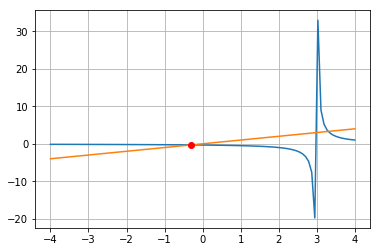

In [10]:
#Aca se puede ver la grafica de la funcion g(x) y como se intercepta con la funcion identidad 
%matplotlib inline
import matplotlib.pyplot as plot
import numpy as np

x=np.linspace(-4,4,100)
plot.plot(x,g(x))
plot.plot(x,x)
plot.plot(p,g(p),"ro")
plot.grid()
plot.show()


# Metodo de la Secante

#### En el analisis numerico el metodo de la secante es un metodo para encontrar las raices de una funcion de forma iterativa.
#### Es una variación del método de Newton-Raphson donde en vez de calcular la derivada de la función en el punto de estudio, teniendo en mente la definición de derivada, se aproxima la pendiente a la recta que une la función evaluada en el punto de estudio y en el punto de la iteración anterior. Este método es de especial interés cuando el coste computacional de derivar la función de estudio y evaluarla es demasiado elevado, por lo que el método de Newton no resulta atractivo.

#### En otras palabras, el método de la secante es un algoritmo de la raíz de investigación que utiliza una serie de raíces de las líneas secantes para aproximar mejor la raíz de una función f. El método de la secante se puede considerar como una aproximación en diferencias finitas del método de Newton-Raphson. Sin embargo, este método fue desarrollado independientemente de este último.

In [30]:
def poli(x):
    return x** 2 - 3 * x - 1
x0=0
x1=-1
x2 = 0
i2=0
tolerancia = 1e-6
error = 1
raiz2=[]
raiz2.insert(0,0)
tabla2=[["i","x0","x1","x2","Error"]]

while abs(error) >tolerancia :
    aux2=[]
    x2= x1 - (poli(x1)*(x1-x0)/(poli(x1)-poli(x0)))
    raiz2.append(x2)
    x0=x1
    x1 = x2
    i2+=1
    error=(raiz2[i2]-raiz2[i2-1])/raiz2[i2]
    aux2=[i2,x0,x1,x2,abs(error)]
    tabla2.append(aux2)
    
print("La aproximacion de la raiz es ",x2)
    
display(HTML(
    '<table class="table"><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabla2)
        )
 ))

La aproximacion de la raiz es  -0.3027756377319947


i,x0,x1,x2,Error
1,-1,-0.25,-0.25,1.0
2,-0.25,-0.29411764705882354,-0.29411764705882354,0.15000000000000002
3,-0.29411764705882354,-0.30290456431535273,-0.30290456431535273,0.02900886381950048
4,-0.30290456431535273,-0.3027753274072063,-0.3027753274072063,0.0004268409492052556
5,-0.3027753274072063,-0.3027756377208985,-0.3027756377208985,1.0248965026464695e-06
6,-0.3027756377208985,-0.3027756377319947,-0.3027756377319947,3.664819142611886e-11


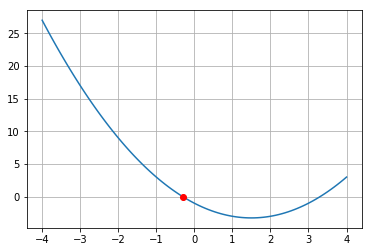

In [31]:

plot.plot(x,f2(x))
plot.plot(x2,poli(x2),"ro")
plot.grid()
plot.show()